In [42]:
import plotly as py
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as  plt
import contextily as ctx
import geopandas as gpd

PROJ: proj_create_from_database: Cannot find proj.db


In [43]:

army_data = pd.read_csv("https://raw.githubusercontent.com/gbby/MBAI-Notebooks/main/data/minard-troops.csv")

city_data = pd.read_csv("https://raw.githubusercontent.com/gbby/MBAI-Notebooks/main/data/minard-cities.csv")

weather_data = pd.read_csv("https://raw.githubusercontent.com/gbby/MBAI-Notebooks/main/data/minard-temp.csv")

In [54]:
map_data = px.data.gapminder()
map_data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [55]:
help(px.scatter_geo)

Help on function scatter_geo in module plotly.express._chart_types:

scatter_geo(data_frame=None, lat=None, lon=None, locations=None, locationmode=None, geojson=None, featureidkey=None, color=None, text=None, symbol=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, size=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, symbol_sequence=None, symbol_map=None, opacity=None, size_max=None, projection=None, scope=None, center=None, fitbounds=None, basemap_visible=None, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a geographic scatter plot, each row of `data_frame` is represented
        by a symbol mark on a map.
        
    Parameters
    ----------
    data_frame: 

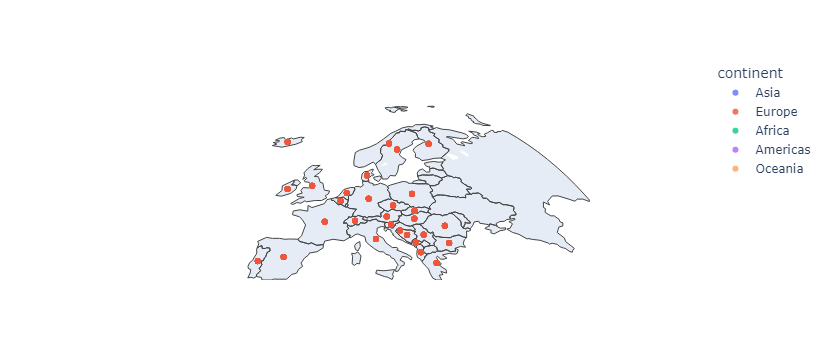

In [83]:
map_fig = px.scatter_geo(map_data, 
                         locations ='iso_alpha',
                         projection = 'orthographic',
                         color = 'continent',
                         opacity = .8,
                         hover_name='country',
                         scope = 'europe'
)
map_fig.show()

In [66]:
help(px.density_mapbox)

Help on function density_mapbox in module plotly.express._chart_types:

density_mapbox(data_frame=None, lat=None, lon=None, z=None, hover_name=None, hover_data=None, custom_data=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, opacity=None, zoom=8, center=None, mapbox_style=None, radius=None, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a Mapbox density map, each row of `data_frame` contributes to the intensity of
        the color of the region around the corresponding point on the map
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This argument needs to be passed for column names (and not keyword
        names) to be used. Array-like and dict are tranformed internally to a
        pandas DataFrame. Optional: if missing, a DataFrame gets constructed
        under the hood

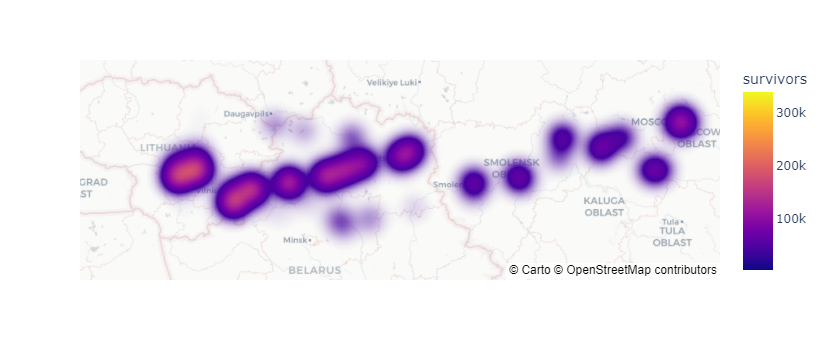

In [92]:
army = px.density_mapbox(army_data, lat = 'lat', lon = 'long',
                         z = 'survivors',
                         center = dict(lat = 55, lon = 30),
                         zoom = 4.7, 
                         hover_name = 'direction',
                         mapbox_style = 'carto-positron'
                         )
army.show()

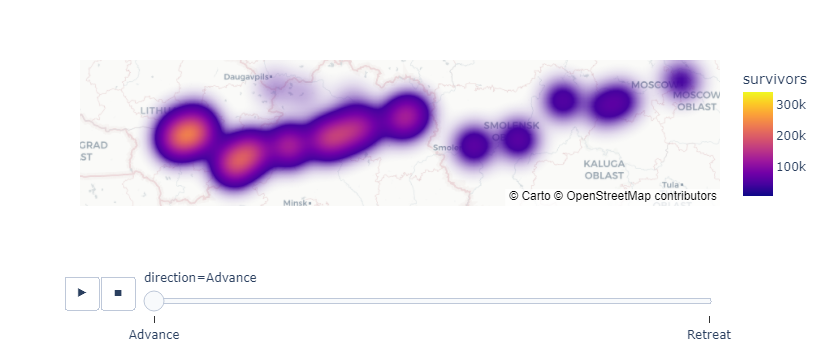

In [97]:
army = px.density_mapbox(army_data, lat = 'lat', lon = 'long',
                         z = 'survivors',
                         center = dict(lat = 55, lon = 30),
                         zoom = 4.7, 
                         hover_name = 'direction',
                         mapbox_style = 'carto-positron',
                         animation_frame = 'direction',
                         animation_group = 'group',
                         radius = 40
                         )
army.show()